**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [8]:
# ваш код
text = ["""Аэропорт Домодедово продадут на аукционе — его стартовая цена составила 132,2 млрд рублей. Ранее аэропорт принадлежал бизнесменам Дмитрию Каменщику и Валерию Когану, но в 2025 году против них возбудили уголовные дела. Тогда Домодедово забрали в доход государства.""",
        """Всемирная федерация кошек объявила: лучшим котом 2025 года признан абиссинский котик из России. Его имя — Дарлен Флер Далмор Блэк. В комментариях пишите клички ваших котиков.""",
        """Каждый третий россиянин лишь создаёт видимость занятости в первые рабочие дни января. На самом деле около 30% граждан занимаются личными делами — читают книги, смотрят фильмы и не забывают про хобби.""",
        """Торговля между Россией и США при Трампе выросла на четверть, почти до $4 млрд, следует из данных американской таможни. """,
        """Зарплаты курьеров в России взлетели до 170 тысяч рублей, следует из данных HH. Лучшие зарплаты предлагают доставщикам в Северной Осетии (190,8 тысячи), Московской области, Кабардино-Балкарии и ЯНАО (по 190 тысяч), а также в Удмуртии (189,6 тысячи).""",
        """В Англии ночью засияло розовое небо. Такая красота возникла из-за светодиодных ламп стадиона местного футбольного клуба «Бирмингем Сити». Их свет отражался от падающего снега и плотных облаков. """,
        """В Баварии тем временем свои проблемы. Стадо овец забежало в супермаркет и разнесло все внутри. Сразу после они спокойно ушли из магазина. """,
        """В Великобритании начал действовать запрет на рекламу вредной пищи на телевидении до 21:00. Согласно новым правилам, нельзя будет демонстрировать еду с большим количеством жира, сахара и соли — чипсы, картофель фри, овсяные хлопья и тд. Меру объяснили борьбой с ожирением у детей. """,
        """Самой дорогой покупкой на маркетплейсе в 2025 году стала квартира стоимостью 11 млн рублей. Среди других люксовых заказов — автомобили, квадроциклы, серверные процессоры и 3D-сканеры. """,
        """В Петербурге к Эрмитажу выстроилась огромная очередь. Она растянулась до Александровской колонны.""",
        """В Сочи произошло землетрясение магнитудой 4,1. Толчки ощущались в Лазаревском и Центральном районах, эпицентр — в Черном море в 5 км от города."""]

import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('punkt')
nlp_en = spacy.load("en_core_web_sm")
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def normalize_text(text):
  text = text.lower()
  text = text.replace('ё', 'е')
  text = text.replace('\n', ' ')

  text = text.translate(str.maketrans('', '', string.punctuation))
  quotes_to_remove = ['«', '»', '„', '“', '”', '‘', '’', '—', '°', '⋅']
  for quote in quotes_to_remove:
      text = text.replace(quote, ' ')

  text = re.sub(r'\d+', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

normalized_documents = []
for doc in text:
    normalized_documents.append(normalize_text(doc))


print("Предобработанные тексты:")
for i, doc in enumerate(normalized_documents):
    print(f"текст {i+1}: {doc}")

Предобработанные тексты:
текст 1: аэропорт домодедово продадут на аукционе его стартовая цена составила млрд рублей ранее аэропорт принадлежал бизнесменам дмитрию каменщику и валерию когану но в году против них возбудили уголовные дела тогда домодедово забрали в доход государства
текст 2: всемирная федерация кошек объявила лучшим котом года признан абиссинский котик из россии его имя дарлен флер далмор блэк в комментариях пишите клички ваших котиков
текст 3: каждый третий россиянин лишь создает видимость занятости в первые рабочие дни января на самом деле около граждан занимаются личными делами читают книги смотрят фильмы и не забывают про хобби
текст 4: торговля между россией и сша при трампе выросла на четверть почти до млрд следует из данных американской таможни
текст 5: зарплаты курьеров в россии взлетели до тысяч рублей следует из данных hh лучшие зарплаты предлагают доставщикам в северной осетии тысячи московской области кабардинобалкарии и янао по тысяч а также в удмуртии тысячи

In [10]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 59.1 MB/s eta 0:00:00


In [11]:
import pymorphy3
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


morph = pymorphy3.MorphAnalyzer()

def preprocess_text(text):

    text = text.lower()
    tokens = word_tokenize(text, language='russian')

    russian_stopwords = set(stopwords.words('russian'))
    punctuation = set(string.punctuation)

    filtered_tokens = []
    for token in tokens:

        clean_token = ''.join(char for char in token if char not in punctuation)
        if clean_token and clean_token not in russian_stopwords:
            filtered_tokens.append(clean_token)


    lemmatized_tokens = []
    for token in filtered_tokens:
        parsed_token = morph.parse(token)[0]
        lemmatized_tokens.append(parsed_token.normal_form)

    return lemmatized_tokens


lemmatized_documents = []
for doc in normalized_documents:
    lemmatized_documents.append(preprocess_text(doc))


print("Предобработанные тексты:")
for i, doc in enumerate(lemmatized_documents):
    print(f"текст {i+1}: {doc}")


Предобработанные тексты:
текст 1: ['аэропорт', 'домодедово', 'продать', 'аукцион', 'стартовый', 'цена', 'составить', 'млрд', 'рубль', 'ранее', 'аэропорт', 'принадлежать', 'бизнесмен', 'дмитрий', 'каменщик', 'валерий', 'коган', 'год', 'против', 'возбудить', 'уголовный', 'дело', 'домодедово', 'забрать', 'доход', 'государство']
текст 2: ['всемирный', 'федерация', 'кошка', 'объявить', 'хороший', 'кот', 'год', 'признать', 'абиссинский', 'котик', 'россия', 'имя', 'дарлена', 'флера', 'далмор', 'блэк', 'комментарий', 'писать', 'кличка', 'ваш', 'котик']
текст 3: ['каждый', 'третий', 'россиянин', 'лишь', 'создавать', 'видимость', 'занятость', 'первый', 'рабочий', 'день', 'январь', 'сам', 'дело', 'около', 'гражданин', 'заниматься', 'личный', 'дело', 'читать', 'книга', 'смотреть', 'фильм', 'забывать', 'хобби']
текст 4: ['торговля', 'россия', 'сша', 'трамп', 'вырасти', 'четверть', 'млрд', 'следовать', 'данные', 'американский', 'таможня']
текст 5: ['зарплата', 'курьер', 'россия', 'взлететь', 'тысяча

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def process_lemmatized_documents(lemmatized_docs_list):

    processed_documents_str_local = [" ".join(doc) for doc in lemmatized_docs_list]

    count_vectorizer_local = CountVectorizer()


    bow_matrix_local = count_vectorizer_local.fit_transform(processed_documents_str_local)


    feature_names_local = count_vectorizer_local.get_feature_names_out()

    return bow_matrix_local, feature_names_local


bow_matrix, bow_feature_names = process_lemmatized_documents(lemmatized_documents)


bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=bow_feature_names,
    index=[f'Документ {i+1}' for i in range(len(lemmatized_documents))]
)


print("Матрица Bag of Words:")
print(bow_df)

Матрица Bag of Words:
             dсканер  hh  абиссинский  автомобиль  александровский  \
Документ 1         0   0            0           0                0   
Документ 2         0   0            1           0                0   
Документ 3         0   0            0           0                0   
Документ 4         0   0            0           0                0   
Документ 5         0   1            0           0                0   
Документ 6         0   0            0           0                0   
Документ 7         0   0            0           0                0   
Документ 8         0   0            0           0                0   
Документ 9         1   0            0           1                0   
Документ 10        0   0            0           0                1   
Документ 11        0   0            0           0                0   

             американский  англия  аукцион  аэропорт  бавария  ...  цена  \
Документ 1              0       0        1         2        0

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


tfidf_documents_str = [' '.join(doc) for doc in lemmatized_documents]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(tfidf_documents_str)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(tfidf_documents_str))]
)


print("Матрица TF-IDF:")
print(tfidf_df)

Матрица TF-IDF:
              dсканер        hh  абиссинский  автомобиль  александровский  \
Документ 1   0.000000  0.000000     0.000000    0.000000         0.000000   
Документ 2   0.000000  0.000000     0.213879    0.000000         0.000000   
Документ 3   0.000000  0.000000     0.000000    0.000000         0.000000   
Документ 4   0.000000  0.000000     0.000000    0.000000         0.000000   
Документ 5   0.000000  0.165926     0.000000    0.000000         0.000000   
Документ 6   0.000000  0.000000     0.000000    0.000000         0.000000   
Документ 7   0.000000  0.000000     0.000000    0.000000         0.000000   
Документ 8   0.000000  0.000000     0.000000    0.000000         0.000000   
Документ 9   0.236619  0.000000     0.000000    0.236619         0.000000   
Документ 10  0.000000  0.000000     0.000000    0.000000         0.353553   
Документ 11  0.000000  0.000000     0.000000    0.000000         0.000000   

             американский    англия   аукцион  аэропорт   б

In [14]:
import numpy as np
bow_sum = np.sum(bow_matrix.toarray(), axis=0)
word_bow_dict = dict(zip(bow_feature_names, bow_sum))
top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слова по всей коллекции ===\n")
print("Топ-10 слова по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
word_tfidf_dict = dict(zip(tfidf_feature_names, tfidf_sum))
top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слова по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")


=== Топ-10 слова по всей коллекции ===

Топ-10 слова по BOW (самые частые в коллекции):
- тысяча: 4 раз
- год: 3 раз
- дело: 3 раз
- россия: 3 раз
- рубль: 3 раз
- аэропорт: 2 раз
- данные: 2 раз
- домодедово: 2 раз
- зарплата: 2 раз
- котик: 2 раз

Топ-10 слова по TF-IDF (с наибольшим весом по всей коллекции):
- тысяча: 0.6637
- россия: 0.5262
- дело: 0.5042
- год: 0.4792
- рубль: 0.4432
- млрд: 0.4335
- котик: 0.4278
- данные: 0.4155
- следовать: 0.4155
- сам: 0.3744

Сравнение топ-10 слов:
Общие слова в обоих топ-10: рубль, дело, данные, котик, год, россия, тысяча
Только в BOW топ-10: аэропорт, зарплата, домодедово
Только в TF-IDF топ-10: млрд, сам, следовать


In [17]:

# Функция для предобработки текста
def preprocess_text(text):
    """Функция для базовой обработки текста"""
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

# Предобрабатываем каждое предложение в корпусе
processed_corpus = [preprocess_text(sentence) for sentence in normalized_documents]

In [26]:
!pip install gensim
from gensim.models import Word2Vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 39.3 MB/s eta 0:00:00


In [30]:
def preprocess_text_for_w2v(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    return tokens


processed_corpus_w2v = [preprocess_text_for_w2v(sentence) for sentence in normalized_documents]

model = Word2Vec(sentences=processed_corpus_w2v, vector_size=100, window=5, min_count=1, workers=4)

def sentence_to_vector(sentence, model):
    """
    Преобразует предложение в вектор, усредняя векторы слов

    Args:
        sentence: Исходное предложение
        model: Word2Vec

    Returns:
        Вектор предложения
    """

    words = preprocess_text_for_w2v(sentence)

    words = [word for word in words if word in model.wv]

    if not words:

        return np.zeros(model.vector_size)


    word_vectors = [model.wv[word] for word in words]

    return np.mean(word_vectors, axis=0)

sentence_vectors = [sentence_to_vector(sentence, model) for sentence in normalized_documents]

def find_similar_sentences(query, model, top_n=3):

    query_vector = sentence_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)

    if query_norm == 0:

        return []

    similarities = []
    for i, sentence_vector in enumerate(sentence_vectors):
        denom = query_norm * np.linalg.norm(sentence_vector)
        if denom == 0:
            similarity = 0.0
        else:
            similarity = float(np.dot(query_vector, sentence_vector) / denom)

        similarities.append((text[i], similarity))


    similarities.sort(key=lambda x: x[1], reverse=True)


    return similarities[:top_n]

print("\n=== Поиск похожих предложений ===")

for query_text in text:

    short_query = " ".join(query_text.split()[:5])
    print(f"\nЗапрос: {short_query}...")

    similar = find_similar_sentences(query_text, model, top_n=3)

    for i, (sentence, score) in enumerate(similar, 1):
        short_sentence = sentence[:50] + "..." if len(sentence) > 50 else sentence
        print(f"{i}. {short_sentence} (сходство: {score:.4f})")


=== Поиск похожих предложений ===

Запрос: Аэропорт Домодедово продадут на аукционе...
1. Аэропорт Домодедово продадут на аукционе — его ста... (сходство: 1.0000)
2. Самой дорогой покупкой на маркетплейсе в 2025 году... (сходство: 0.5579)
3. В Великобритании начал действовать запрет на рекла... (сходство: 0.3773)

Запрос: Всемирная федерация кошек объявила: лучшим...
1. Всемирная федерация кошек объявила: лучшим котом 2... (сходство: 1.0000)
2. В Баварии тем временем свои проблемы. Стадо овец з... (сходство: 0.3106)
3. В Великобритании начал действовать запрет на рекла... (сходство: 0.2523)

Запрос: Каждый третий россиянин лишь создаёт...
1. Каждый третий россиянин лишь создаёт видимость зан... (сходство: 0.9847)
2. Зарплаты курьеров в России взлетели до 170 тысяч р... (сходство: 0.2504)
3. В Сочи произошло землетрясение магнитудой 4,1. Тол... (сходство: 0.2117)

Запрос: Торговля между Россией и США...
1. Торговля между Россией и США при Трампе выросла на... (сходство: 1.0000)
2. В Ве

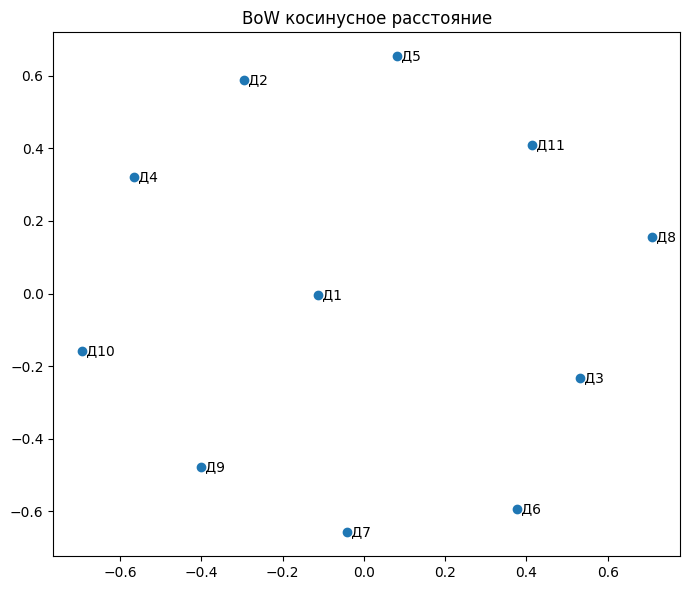

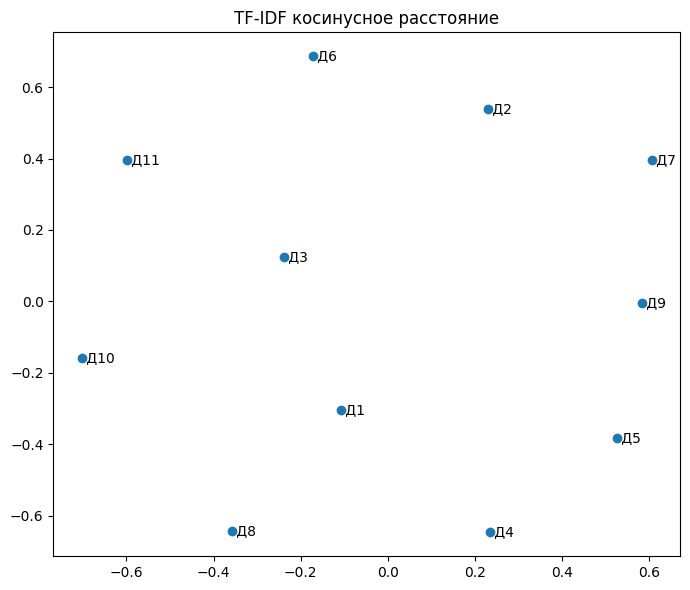

In [28]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

labels = [f'Д{i+1}' for i in range(len(lemmatized_documents))]

plot_mds(bow_matrix, labels, "BoW косинусное расстояние")
plot_mds(tfidf_matrix, labels, "TF-IDF косинусное расстояние")

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [ ]:
# ваш код

english_text = """THE FOX, THE HARE AND THE ROOSTER. Once upon a time there lived a fox and a hare. The fox had an ice hut, and the hare, a hut of lime  tree bark. Beautiful spring came and the fox's hut melted, while the hare's stood as before. The fox asked the hare to let her in to warm herself and then kicked the hare out.
The hare walked along the road crying, and met some dogs.
«Bow--wow--wow, why are you crying, little hare?»
The hare said, «Leave me alone, dogs! How can I help cry-ing? I had a hut made of lime tree bark and the fox, one of ice. She asked me to let her in and then kicked me out.»
«Don't cry, hare!» said the dogs.
«We shall kick her out.»
«No you won't!»
«Yes we will!»
They went up to the hut and the dogs barked, «Bow-wow-wow!
Go away, fox!»
But she replied from the stove,
«When I dart out, when I jump out, only fur will fly about!»
The dogs got scared and went away.
Again the hare walked away crying. He met a bear.
«Why are you crying, hare?»
The hare said, «Leave me alone, bear! How can I help cry-ing? I had a hut made of lime tree
bark, and the fox, one of ice. She asked me to let her in and then kicked me out.»
«Don't cry, hare,» said the bear,
«I'll kick her out.»
«No you won't! The dogs tried and didn't succeed, and you won't either.»
«Yes, I will!»
They went to kick her out.
«Go away, fox!»
But she replied from the stove,
«When I dart out, when I Jump out, only fur will fly about!»
The bear got scared and went away.
Again the hare walked away crying, and met a bull.
«Why are you crying, hare?»
«Leave me alone, bull! How can I help crying? I had a hut made of lime tree bark, and the fox, one of ice. She asked me to let her in and then kicked me out.»
«Let's go. I will kick her out.»
«No, bull, you won't. The dog tried and didn't succeed, the bear tried and couldn't, and you won't either.»
«Yes, I will.»
They went up to the hut.
«Go away, fox!»
But she replied from the stove,
«As I dart out, as I jump out, only fur will fly about!»
The bull got scared and went away.
Again the hare walked away crying, and met a rooster with a sickle.
«Cock-a-doodle-doo! Why are you crying, hare?»
«Leave me alone, rooster! How can I help crying? I had a hut made of lime tree bark, and the fox, one of ice. She asked me to let her in and then kicked me out.»
«Let's go. I will kick her out.»
«No you won't! The dog tried and didn't succeed, the bear tried and couldn't, the bull tried and couldn't, and you won't either.»
«Yes I will!»
They went up to the hut.
«Cock-a-doodle-doo! I have a sickle on my shoulders. I want to cut the fox to pieces! Get out, fox!»
She heard, got scared and said, «I am gettingdressed!»
The rooster called again, «Cock-a--doodle- -doo! I have a sickle on my shoulders. I want to cut the fox to pieces! Get out, fox!»
She said, «I am putting on my fur coat!»
The rooster called for the third time, «Cock-a-doodle-doo! I have a sickle on my shoulders. I want to cut the fox to pieces! Get out, fox!»
The fox ran out. He cut her up with his sickle and began to live with the hare and to prosper.
There's a tale for you and a crock of butter for me."""

russian_text = """ЛИСА, ЗАЯЦ И ПЕТУХ. Жили были лиса да заяц. У лисицы была избушка ледяная, а у зайца лубяная. Пришла весна красна — у лисицы избушка растаяла, а у зайца стоит по-старому. Лиса попросилась к зайцу погреться, да зайчика — то и выгнала. Идет дорогой зайчик да плачет, а ему навстречу собаки:
— Тяф, тяф, тяф! Что, зайчик плачешь?
А зайчик говорит:
— Отстаньте, собаки! Как мне не плакать? Была у меня избушка лубяная, а у лисы ледяная. Попросилась она ко мне, да меня и выгнала.
Не плачь, зайчик, говорят собаки. — Мы ее выгоним.
— Нет, не выгоните!
— Нет, выгоним!
Подошли к избушке:
—Тяф, тяф, тяф! Поди лиса вон!
А она им с печи:
—Как выскочу, как выпрыгну, пойдут клочки по закоулочкам!
Собаки испугались и ушли.
Зайчик опять идет да плачет. Ему навстречу медведь:
— О чем, зайчик, плачешь?
А зайчик говорит:
— Отстань, медведь! Как мне не плакать? Была у меня избушка лубяная, а у лисы ледяная. Попросилась она ко мне, да меня и выгнала.
— Не плачь, зайчик,— говорит медведь.— Я выгоню ее.
— Нет, не выгонишь! Собаки гнали— не выгнали, и ты не выгонишь.
— Нет, выгоню!
Пошли гнать.
— Поди, лиса, вон!
А она с печи:
— Как выскочу, как выпрыгну, пойдут клочки по закоулочкам!
Медведь испугался и ушел.
Идет опять зайчик да плачет, а ему навстречу бык:
— Про что, зайчик, плачешь?
— Отстань, бык! Как мне не плакать? Была у меня избушка лубяная, а у лисы ледяная. Попросилась она ко мне, да меня и выгнала.— Пойдем, я ее выгоню.
— Нет, бык, не выгонишь! Собаки гнали— не выгнали, медведь гнал— не выгнал, и ты не выгонишь.
— Нет, выгоню.
Подошли к избушке:
— Поди, лиса, вон!
А она с печи:
— Как выскочу, как выпрыгну, пойдут клочки по закаулочкам!
Бык испугался и ушел.
Идет опять зайчик да плачет, а ему навстречу петух с косой:
— Ку-ку-реку! О чем, зайчик, плачешь?
— Отстань, петух! Как мне не плакать? Была у меня избушка лубяная, а у лисы ледяная. Попросилась она ко мне, да меня и выгнала.
— Пойдем, я выгоню.
— Нет, не выгонишь! Собаки гнали — не выгнали, медведь гнал — не выгнал, бык гнал — не выгнал, и ты не выгонишь.
— Нет, выгоню!
Подошли к избушке:
— Ку-ку-реку! Несу косу на плечи, хочу лису посечи! Поди, лиса, вон!
А она услыхала, испугалась,говорит:
— Одеваюсь...
Петух опять:
— Ку-ку-реку! Несу косу на плечи, хочу лису посечи! Поди, лиса, вон!
А она говорит:
— Шубу надеваю.
Петух в третий раз:
— Ку-ку-реку! Несу косу на плечи, хочу лису посечи! Поди, лиса, вон!
Лисица выбежала. Он ее зарубил косой-то и стал с зайчиком жить — поживать да добра наживать.
Вот тебе сказка, а мне кринка масла."""

In [ ]:
!pip install nltk spacy pymorphy3
!pip install inflect

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
import string
import pymorphy3
import inflect

nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
text_tok = word_tokenize(english_text)
tagged = nltk.pos_tag(text_tok)
list_of_tagged = []

for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)

print("Английский текст:",list_of_tagged)

morph = pymorphy3.MorphAnalyzer()
text_tok = word_tokenize(russian_text)
rus_list_of_tagged = []

for word in text_tok:
    parses = morph.parse(word)
    best_parse = parses[0]
    pos = best_parse.tag.POS
    _case = best_parse.tag.case
    gender = best_parse.tag.gender
    number = best_parse.tag.number
    person = best_parse.tag.person
    tense = best_parse.tag.tense
    if pos == 'NOUN':
        rus_list_of_tagged.append(f'{word}_{pos}_{_case}_{gender}_{number}')
    elif pos == 'VERB':
        rus_list_of_tagged.append(f'{word}_{pos}_{person}_{tense}_{number}')
    else:
        rus_list_of_tagged.append(f'{word}_{pos}')

print("Русский текст:", rus_list_of_tagged)

Английский текст: ['THE_DT', 'FOX_NNP', ',_,', 'THE_NNP', 'HARE_NNP', 'AND_NNP', 'THE_NNP', 'ROOSTER_NNP', '._.', 'Once_NNP', 'upon_IN', 'a_DT', 'time_NN', 'there_RB', 'lived_VBD', 'a_DT', 'fox_NN', 'and_CC', 'a_DT', 'hare_NN', '._.', 'The_DT', 'fox_NN', 'had_VBD', 'an_DT', 'ice_NN', 'hut_NN', ',_,', 'and_CC', 'the_DT', 'hare_NN', ',_,', 'a_DT', 'hut_NN', 'of_IN', 'lime_JJ', 'tree_JJ', 'bark_NN', '._.', 'Beautiful_JJ', 'spring_NN', 'came_VBD', 'and_CC', 'the_DT', 'fox_NN', "'s_POS", 'hut_NN', 'melted_VBD', ',_,', 'while_IN', 'the_DT', 'hare_NN', "'s_POS", 'stood_NN', 'as_IN', 'before_RB', '._.', 'The_DT', 'fox_NN', 'asked_VBD', 'the_DT', 'hare_NN', 'to_TO', 'let_VB', 'her_PRP', 'in_IN', 'to_TO', 'warm_VB', 'herself_PRP', 'and_CC', 'then_RB', 'kicked_VBD', 'the_DT', 'hare_NN', 'out_IN', '._.', 'The_DT', 'hare_NN', 'walked_VBD', 'along_IN', 'the_DT', 'road_NN', 'crying_NN', ',_,', 'and_CC', 'met_VBD', 'some_DT', 'dogs_NNS', '._.', '«_JJ', 'Bow_NNP', '--_:', 'wow_NN', '--_:', 'wow_NN', ',

In [ ]:
tokens = word_tokenize(english_text)
tokens = [t for t in tokens if re.search(r"[A-Za-z0-9]", t)]
tagged = pos_tag(tokens)
pos_counts = Counter(tag for _, tag in tagged)

print("Английский текст:", pos_counts.most_common())


pos_counts = Counter()

for word in text_tok:

    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    parse = morph.parse(word)[0]
    pos = parse.tag.POS or "UNKN"
    pos_counts[pos] += 1

print("Русский текст:", pos_counts.most_common())

Английский текст: [('NN', 79), ('PRP', 77), ('DT', 64), ('VBD', 58), ('RB', 47), ('VB', 45), ('IN', 39), ('NNP', 35), ('CC', 35), ('JJ', 30), ('MD', 26), ('VBP', 19), ('TO', 18), ('RP', 14), ('NNS', 11), ('VBN', 10), ('VBG', 10), ('PRP$', 10), ('WRB', 8), ('POS', 4), ('CD', 4), ('VBZ', 2), ('UH', 1), ('EX', 1)]
Русский текст: [('NOUN', 102), ('VERB', 101), ('CONJ', 44), ('NPRO', 44), ('PREP', 35), ('PRCL', 31), ('ADVB', 16), ('ADJF', 11), ('UNKN', 10), ('INFN', 9), ('PRED', 8), ('INTJ', 6), ('ADJS', 1)]


In [ ]:
p = inflect.engine()
nlp = spacy.load("en_core_web_sm")

def pluralize_nouns_spacy(text: str) -> str:
    doc = nlp(text)
    out = []

    for tok in doc:
        if tok.tag_ in ("NN", "NNP"):
            pl = p.plural_noun(tok.text) or p.plural(tok.text)

            if tok.text.isupper():
                pl = pl.upper()
            elif tok.text.istitle():
                pl = pl.title()

            out.append(pl + tok.whitespace_)
        else:
            out.append(tok.text_with_ws)

    return "".join(out)

print(pluralize_nouns_spacy(english_text))

THE FOXES, THE HARES AND THE ROOSTERS. Once upon a times there lived a foxes and a hares. The foxes had an ices huts, and the hares, a huts of limes  trees barks. Beautiful springs came and the foxes's huts melted, while the hares's stood as before. The foxes asked the hares to let her in to warm herself and then kicked the hares out. 
The hares walked along the roads cryings, and met some dogs.
«Bows--wow--wow, why are you crying, little hares?»S
The hares said, «Leave me alone, dogs! How can I help cry-ings? I had a huts made of limes trees barks and the foxes, one of ices. She asked me to let her in and then kicked me out.»S
«Don't cry, hares!»S said the dogs.
«We shall kick her out.»S
«No you won't!»S
«Yes we will!»
They went up to the huts and the dogs barked, «Bows-wows-wow!
Go away, foxes!»S
But she replied from the stoves,
«When I dart out, when I jump out, only furs will fly about!»S
The dogs got scared and went away.
Again the hares walked away crying. He met a bears.
«Why ar

In [ ]:
detok = TreebankWordDetokenizer()
def pluralize_nouns_pymorphy() -> str:

    tokens = word_tokenize(russian_text)
    new_tokens = []

    for w in tokens:
        if any(ch.isalpha() for ch in w):
            p = morph.parse(w)[0]
            if p.tag.POS == "NOUN" and p.tag.number == "sing":
                gramm = {"plur"}
                if p.tag.case:
                    gramm.add(p.tag.case)
                if p.tag.animacy:
                    gramm.add(p.tag.animacy)

                inf = p.inflect(gramm)
                if inf:
                    w = inf.word
        new_tokens.append(w)
    return new_tokens

new_text = detok.detokenize(pluralize_nouns_pymorphy())
print(new_text)


лисы, зайцы И петухи . Жили были лисы да зайцы . У лисицы была избушки ледяная, а у зайцев лубяная . Пришла вёсны красна — у лисицы избушки растаяла, а у зайцев стоит по-старому . лисы попросилась к зайцам погреться, да зайчиков — то и выгнала . Идет дорогами зайчики да плачет, а ему навстречу собаки: — Тяф, тяф, тяф! Что, зайчики плачешь? А зайчики говорит: — Отстаньте, собаки! Как мне не плакать? Была у меня избушки лубяная, а у лисы ледяная . Попросилась она ко мне, да меня и выгнала . Не плачь, зайчики, говорят собаки . — Мы ее выгоним . — Нет, не выгоните! — Нет, выгоним! Подошли к избушках: —тяфы, тяф, тяф! Поди лисы вон! А она им с печей: —Как выскочу, как выпрыгну, пойдут клочки по закоулочкам! Собаки испугались и ушли . зайчики опять идет да плачет . Ему навстречу медведи: — О чем, зайчики, плачешь? А зайчики говорит: — Отстань, медведи! Как мне не плакать? Была у меня избушки лубяная, а у лисы ледяная . Попросилась она ко мне, да меня и выгнала . — Не плачь, зайчики, — говори

In [ ]:
eng_tokens = word_tokenize(english_text)
eng_tagged = nltk.pos_tag(eng_tokens)

eng_df = pd.DataFrame(eng_tagged, columns=["token", "pos_tag"])

morph = pymorphy3.MorphAnalyzer()
rus_tokens = word_tokenize(russian_text)

rus_rows = []
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue

    p = morph.parse(word)[0]
    pos = p.tag.POS or "UNKN"

    row = {
        "token": word,
        "pos_tag": pos,
        "case": p.tag.case,
        "gender": p.tag.gender,
        "number": p.tag.number,
        "person": p.tag.person,
        "tense": p.tag.tense,
    }
    rus_rows.append(row)

rus_df = pd.DataFrame(rus_rows)


eng_tokens_np = [t for t in word_tokenize(english_text) if re.search(r"[A-Za-z0-9]", t)]
eng_pos_counts = Counter(tag for _, tag in pos_tag(eng_tokens_np))
eng_freq_df = pd.DataFrame(eng_pos_counts.most_common(), columns=["pos_tag", "count"])

rus_pos_counts = Counter()
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    pos = morph.parse(word)[0].tag.POS or "UNKN"
    rus_pos_counts[pos] += 1

rus_freq_df = pd.DataFrame(rus_pos_counts.most_common(), columns=["pos_tag", "count"])


print("ENG tagged table:")
print(eng_df)

print("\nRUS tagged table:")
print(rus_df)

print("\nENG POS frequency:")
print(eng_freq_df)

print("\nRUS POS frequency:")
print(rus_freq_df)


ENG tagged table:
      token pos_tag
0       THE      DT
1       FOX     NNP
2         ,       ,
3       THE     NNP
4      HARE     NNP
..      ...     ...
839      of      IN
840  butter      NN
841     for      IN
842      me     PRP
843       .       .

[844 rows x 2 columns]

RUS tagged table:
      token pos_tag  case gender number person tense
0      ЛИСА    NOUN  nomn   femn   sing   None  None
1      ЗАЯЦ    NOUN  nomn   masc   sing   None  None
2         И    CONJ  None   None   None   None  None
3     ПЕТУХ    NOUN  nomn   masc   sing   None  None
4      Жили    VERB  None   None   plur   None  past
..      ...     ...   ...    ...    ...    ...   ...
413  сказка    NOUN  nomn   femn   sing   None  None
414       а    CONJ  None   None   None   None  None
415     мне    NPRO  datv   None   sing   1per  None
416  кринка    NOUN  nomn   femn   sing   None  None
417   масла    NOUN  gent   neut   sing   None  None

[418 rows x 7 columns]

ENG POS frequency:
   pos_tag  count
0

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [ ]:
# ваш код
english_sentences = [
    "The sea was calm tonight.",
    "The ocean looks like clear sky.",
    "The sea was rough, and the boat rocked violently.",
    "He loved the sea, which had always been his home.",
    "When the storm finally passed, we saw that the coastline had changed, and several trees had been washed away."
]

russian_sentences = [
    "Волны разбивались о берег.",
    "Море было лазурным",
    "Море шумело, и волны бежали одна за другой.",
    "Когда шторм утих, мы увидели, что палуба была залита водой, а паруса порваны",
    "Море, которое ещё недавно было спокойным, внезапно разбушевалось, и высокие волны начали биться о скалы."
]

In [ ]:
!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")


from spacy import displacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 18.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from spacy import displacy

In [ ]:
for i, sentence in enumerate(russian_sentences, 1):
    doc_ru = nlp_ru(sentence)

    print(f"Sentence {i}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 1


Sentence 2


Sentence 3


Sentence 4


Sentence 5


In [ ]:
for i, sentence in enumerate(english_sentences, 1):
    doc_en = nlp_en(sentence)

    print(f"Sentence {i}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 1


Sentence 2


Sentence 3


Sentence 4


Sentence 5


In [ ]:
def find_subj_and_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)

    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]

    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:

            current = token
            while current.head != current:
                if current.head in pred_tokens or current.head == root:

                    subj.append(token.text)
                    break
                current = current.head

    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)

    return subj, pred


print("English sentences")
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_and_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

English sentences
Предложение: The sea was calm tonight.
Подлежащее: ['sea'], Сказуемое: ['was']

Предложение: The ocean looks like clear sky.
Подлежащее: ['ocean'], Сказуемое: ['looks']

Предложение: The sea was rough, and the boat rocked violently.
Подлежащее: ['sea', 'boat'], Сказуемое: ['was']

Предложение: He loved the sea, which had always been his home.
Подлежащее: ['He', 'which'], Сказуемое: ['loved']

Предложение: When the storm finally passed, we saw that the coastline had changed, and several trees had been washed away.
Подлежащее: ['storm', 'we', 'coastline', 'trees'], Сказуемое: ['saw']



In [ ]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred


print("Russian sentences")
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Russian sentences
Предложение: Волны разбивались о берег.
Подлежащее: ['Волны'], Сказуемое: ['разбивались']

Предложение: Море было лазурным
Подлежащее: ['Море'], Сказуемое: ['было лазурным']

Предложение: Море шумело, и волны бежали одна за другой.
Подлежащее: ['Море', 'волны', 'одна'], Сказуемое: ['шумело', 'бежали']

Предложение: Когда шторм утих, мы увидели, что палуба была залита водой, а паруса порваны
Подлежащее: ['мы', 'мы'], Сказуемое: ['увидели', 'порваны']

Предложение: Море, которое ещё недавно было спокойным, внезапно разбушевалось, и высокие волны начали биться о скалы.
Подлежащее: ['Море', 'волны'], Сказуемое: ['разбушевалось', 'начали биться']



In [ ]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")



Поиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):
Найден объект: высокие — зависит от существительного: волны


In [ ]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (english):")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск пар слов, связанных отношением определения (прилагательное-существительное) (english):
Найден объект: clear — зависит от существительного: sky
Найден объект: several — зависит от существительного: trees


In [ ]:
def get_svo(sentence, lang='en'):
    if lang == 'rus':
        doc = nlp_ru(sentence)
        for token in doc:
            if token.dep_ == "nsubj":
                subj = token.text
            if token.dep_ == "obj":
                obj = token.text
                predicate = token.head.text
                print(f"{subj} {predicate} {obj} ")
    else:
        doc = nlp_en(sentence)
        for token in doc:
            if token.dep_ in {"nsubj", "nsubjpass", "csubj", "csubjpass"}:
                subj = token.text
                predicate = token.head.text
            if token.dep_ in {"dobj", "iobj", "obj"}:
                obj = token.text
                print(f"{subj} {predicate} {obj}")

print("Русское SVO")
print(20 * '-')
for sentence in russian_sentences:
    get_svo(sentence, 'rus')

print("\nАнглийское SVO")
print(20 * '-')
for sentence in english_sentences:
    get_svo(sentence, 'en')

Русское SVO
--------------------

Английское SVO
--------------------
He loved sea


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [ ]:
# ваш код
text = """
1. Платные парковки города Владивостока с сегодняшнего дня работают в обычном режиме — то есть платно. Бесплатными они были только один день — понедельник, 12 января — из-за последствий снегопада. Все обочины, на которых размечены платные парковки, оказались в снегу, а расчистить их не было никакой возможности из-за оставшихся запаркованными с выходных машин. Поэтому в первый рабочий день паркрайты на маршруты не вышли. Вторник был признан в «Цифровом Приморье» днём, когда можно возвращать платную парковку. Там обещают, что штрафовать за неоплаченную парковку будут только там, где обочины уже почищены. Методика определения, что можно назвать чистым, а что нет, не уточняется.
2. Житель села Яконовка Уссурийского округа по воле судьбы обзавёлся двумя крупными дикими кошками – леопардами. Два хищника пролезли под забором и стали гостить на частном дворе в понедельник, 12 января, сообщает PRIMPRESS. Двух леопардов мужчина заметил на своём участке, когда решил выглянуть в окно. По его словам, дикие животные «по-кошачьи» пролезли под забором и с интересом стали исследовать новую территорию. После этого леопарды неспешно ушли в сторону леса. Инцидент обошёлся без происшествий, животные людей не трогали. Ещё один из рода кошачьих навестил жителей двух сёл Хасанского округа: Занадворовка и Барабаш. Правда, приморцы не обрадовались визиту дикого тигра. Сегодня сельчане пытаются добиться реакции местных властей, чтобы те отливили полосатого хищника. Несмотря на то, что все три «кошки» не проявляли агрессии к людям и животным, не следует приближаться к диким животным и пытаться контактировать с ними. Если вы столкнулись с леопардом или тигром, необходимо сохранять спокойствие и не паниковать. Постарайтесь медленно отступить назад, избегайте резких движений. При этом издавайте громкие звуки, чтобы животные поняли, что вы человек, а не добыча. Однако стрелять в животных нельзя – уголовная ответственность.
3. Российский абиссинский кот стал настоящей звездой мирового кошачьего сообщества, получив титул самой красивой кошки 2025 года по версии Всемирной федерации кошек. По итогам голосования пушистый чемпион набрал более 19,7 тысячи баллов, оставив позади сотни соперников со всего мира. На втором месте оказалась шотландская вислоухая кошка из Таиланда с 18,5 тысячи баллов, а в общем зачете участвовали почти 1,5 тысячи кошек различных пород, демонстрируя исключительное разнообразие и высокий уровень конкуренции. Эксперты отмечают, что абиссинский кот покорил жюри не только грацией и пропорциями, но и особой харизмой, которая делает его узнаваемым даже среди сотен участников. Короткошерстная, элегантная и подвижная порода завоевывает сердца любителей кошек по всему миру, а российский представитель стал настоящей визитной карточкой страны в международных соревнованиях, пишет ТАСС. Интересно, что успехи российских кошек продолжаются: в предварительном рейтинге 2026 года также лидирует кот из России. На данный момент короткошерстный британец набрал 550 баллов, что уже ставит его в фавориты нового сезона соревнований, отмечает агентство. Таким образом, российские кошки подтверждают свой высокий статус на международной арене, демонстрируя не только красоту и гармоничные формы, но и способность быть настоящими мировыми чемпионами среди своих собратьев.
4. Приморский Краевой Клуб Служебного Собаководства во Владивостоке продолжает знакомить юных кинологов Клуба юного собаковода (КЮС) с основами обращения и воспитания собак. Накануне, 13 декабря, под руководством кинолога ПККСС Алины Глазачевой состоялась вводная лекция, открывающая большой блок воспитания четвероногих питомцев с момента выбора и заведения щенка. Как рассказали в некоммерческой организации, участники лекции ознакомились с принципами отбора щенка для себя, правильными действиями при знакомстве с щенком, начальной подготовкой дома к появлению нового жителя. Отдельно было уделено внимание способами дезинфекции, определению домашней иерархии питомцев и хозяев, распределению своих сил и возможностей и возможностей щенка. Ребята также получили домашнее задание. В рамках этой встречи также состоялась генеральная репетиция серии выездных праздничных утренников, в которых участвуют ученики Клуба юного собаковода ПККСС вместе со своими собаками под руководством преподавателей-кинологов ПККСС. Отметим, что занятия в клубе весьма многогранны. Так, например, 7 декабря воспитанники Клуба юного собаковода встретились с профессиональным кинологом МЧС Екатериной Воронцовой и представителем волонтёрской организации федерального университета "Лапочки" Ангелиной. Главным героем, конечно, стал поисковый шнауцер Вольт.
5. В Приморском крае в период сильных холодов зафиксированы новые исторические максимумы потребления электроэнергии. Рекорд, державшийся на протяжении трёх лет, был дважды побит в течение недели крещенских морозов, сообщает PRIMPRESS. Согласно данным филиала системного оператора Единой энергетической системы Востока, 20 января 2026 года энергосистема региона достигла пика потребления мощности в 2837 МВт. Максимум пришёлся на 19:00 при температуре −18,4 градусов. Новый показатель превзошёл рекорд от 18 января 2026 года (2821 МВт), абсолютный максимум от 21 января 2023 года (2743 МВт). Превышение над предыдущим историческим максимумом составило 94 МВт.
6. Около 5 тысяч человек остались без света в Артеме сегодня утром, 20 января. Отключения были не запланированы, сообщает PRIMPRESS. По данным прокуратуры города Артема, в городе отключено более 518 домов частного сектора и 30 многоквартирных домов, включая улицы Баневура, Вахрушева, Донбасская, Шишкина, Спортивная, Азовская, Фрунзе и другие. Внеплановым масштабным отключением заинтересовалась прокуратура. Причины пока не известны, сейчас как раз ведется проверка и выяснение обстоятельств. В комментариях в соцсетях некоторые возмущенные люди «бьют» тревогу, другие своё возмущение высказывают через юмор.
7. Сведения о 72 гостевых домах из Приморского края размещены в Едином реестре объектов классификации в сфере туристской индустрии к 1 января. Гостевые дома, не включённые в этот реестр, не имеют права оказывать услуги, сообщает PRIMPRESS. Запрет на деятельность гостевых домов, не вошедших в Единый реестр объектов классификации (для регионов, входящих в эксперимент) вступил в силу с 1 января 2026 года. Приморский край — участник эксперимента с 1 сентября 2025 года. Как сообщили в краевом министерстве туризма, на сегодня в Едином реестре размещена информация о 72 гостевых домах как о средствах размещения. Ранее сообщалось, что в крае потенциально соответствуют критериям гостевого дома 100 объектов.
8. Россияне планируют провести новогодние праздники в путешествиях: по данным сервиса онлайн-бронирований отелей и апартаментов «Островок», число бронирований в российских и зарубежных отелях уже опережает прошлогодние значения на десятки процентов. А средняя стоимость забронированной ночи в отелях и апартаментах России на период праздников составляет 7700 рублей – на 8% выше, чем в прошлом году (7100 рублей). Кроме традиционных российских направлений — столиц, курортов и Золотого кольца — популярностью в новогодние праздники пользуются регионы для активного отдыха: по данным «Островка», туристы активнее выбирают Хабаровск (+66%) и Владивосток (+36%). Также у туристов востребованы северные и горнолыжные маршруты: Кировск (+44%), Мурманск (+20%) и Архангельск (+21%). С открытием горнолыжного курорта «Арсеньев» туристов будет ждать и Приморье. В структуре новогодних бронирований растет доля международных направлений – так каждое пятое бронирование на праздники приходится на заграницу (21%). Для поездок на Новый год туристы выбирают преимущественно безвизовые направления с прямым авиасообщением. Самый высокий рост спроса демонстрируют направления Азии: популярность Китая и Вьетнама выросла в 2,5 раза, Таиланда – на 24%, Японии – на 5%. За азиатской группой идут направления Ближнего Востока: спрос на отдых в Объединенных Арабских Эмиратах увеличился на 82%, в Турции — на 60%.
9. Приморский хоккейный клуб «Адмирал», не дождавшись конца сезона, устроил «большую распродажу» — новое руководство клуба решило, что сейчас самый выгодный момент, чтобы обменять своих лидеров. Первые две сделки клуб, ещё далеко не потерявший шансы на плей-офф Кубка Гагарина, уже провернул, сообщает PRIMPRESS. Форвард Даниил Гутик (на фото) официально перешёл в московский «Спартак» — клуб из Владивостока получил взамен Никиту Ефремова, форвардов Даниэля Усманова и Егора Чезганова, а также права на нападающего Максима Мусорова. Вратаря Дмитрия Шугаева и нападающего Игоря Гераськина «Адмирал» обменял в нижегородское «Торпедо» на вратаря Ивана Кульбакова, который, правда, не горит желанием лететь во Владивосток (в любом случае срок контракта белорусского вратаря истекает после этого сезона, и он становится неограниченно свободным агентом). Также у ЦСКА есть предметный интерес к нападающему Степану Старкову. Пользуется спросом и центрфорвард тройки Павел Шэн. Внезапная большая распродажа посреди сезона — довольно странное мероприятие. «Адмирал» по потерянным очкам идёт почти вровень с занимающей восьмую строчку в Восточной конференции «Сибирью», а значит, всё зависит от самой команды. Но, видимо, новые клубные боссы уже «сдали» сезон.
10. Амурского тигра вернули в дикую природу после отлова в Пожарском районе Приморского края, сообщает PRIMPRESS.  Хищника заметили 5 января 2026 года в окрестностях села Верхний Перевал, куда он подходил, следуя за копытными животными. Как сообщили специалисты, тигр приблизился к населённому пункту и оказался рядом с бродячими собаками. Чтобы избежать угрозы для людей и самого животного, было принято решение об отлове. Тигра осмотрели ветеринары — каких-либо травм или признаков истощения у него не выявили, животное оказалось полностью здоровым. После этого на хищника надели спутниковый ошейник, который позволит отслеживать его перемещения и своевременно реагировать, если он снова приблизится к населённым пунктам. Тигра увезли подальше от мест проживания людей и выпустили в подходящую для него среду обитания.
"""

In [ ]:
nlp_ru = spacy.load("ru_core_news_sm")

def spacy_ner(text):
    doc = nlp_ru(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_spacy = spacy_ner(text)

print("Именованные сущности (spaCy):")
for entity, entity_type in entities_spacy:
    print(f"- {entity}: {entity_type}")

Именованные сущности (spaCy):
- Владивостока: LOC
- Цифровом Приморье: ORG
- Яконовка: LOC
- Уссурийского округа: LOC
- PRIMPRESS: ORG
- Хасанского округа: LOC
- Занадворовка: LOC
- Барабаш: LOC
- Всемирной федерации: ORG
- Таиланда: LOC
- ТАСС: ORG
- России: LOC
- Владивостоке: LOC
- Клуба юного собаковода (КЮС): ORG
- ПККСС: ORG
- Алины Глазачевой: PER
- Клуба юного собаковода: ORG
- ПККСС: ORG
- ПККСС: ORG
- Клуба юного собаковода: ORG
- МЧС: ORG
- Екатериной Воронцовой: PER
- Вольт: PER
- Приморском крае: LOC
- PRIMPRESS: ORG
- Единой энергетической системы: ORG
- Востока: LOC
- Артеме: LOC
- PRIMPRESS: ORG
- Артема: LOC
- Баневура: LOC
- Вахрушева: LOC
- Донбасская: PER
- Шишкина: LOC
- Спортивная: LOC
- Азовская: LOC
- Фрунзе: LOC
- Приморского края: LOC
- Едином: LOC
- PRIMPRESS: ORG
- Приморский край: LOC
- Едином: LOC
- Островок: ORG
- России: LOC
- Золотого кольца: LOC
- Островка: ORG
- Хабаровск: LOC
- Владивосток: LOC
- Кировск: LOC
- Мурманск: LOC
- Архангельск: LOC
- Арсе

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def rule_based(text):
    entities = []

    words = word_tokenize(text, language='russian')
    date_patterns = [
        r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря)\s\d{4}',
        r'\d{1,2}/\d{1,2}/\d{4}',
        r'\d{1,2}\.\d{1,2}\.\d{4}'
    ]

    money_patterns = [
        r'\d+(?:,\d+)*(?:\.\d+)?\s(?:руб\.|рублей|р\.|RUB)',
        r'\d+\s(?:млн|млрд|тыс\.)\s(?:руб\.|рублей)',
        r'\$\d+(?:,\d+)*(?:\.\d+)?'
    ]

    percent_patterns = [
        r'\b\d{1,3}(?:[.,]\d+)?\s?%',
        r'\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?)\b'
    ]

    email_patterns = [
        r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b'
    ]

    url_patterns = [
        r'(?:https?://|www\.)[^\s<>"\']+'
    ]

    phone_patterns = [
        r'\+?\d{1,3}[\s-]?\(?\d{3}\)?[\s-]?\d{3}[\s-]?\d{2}[\s-]?\d{2}'
    ]


    person_prefixes = {
        "г-н", "г-жа", "д-р", "проф.", "президент", "министр", "мэр", "губернатор",
        "генерал", "полковник", "капитан", "лейтенант", "депутат"
    }

    location_prefixes = {
        "в", "из", "на", "у", "около", "возле", "близ", "между", "среди"
    }

    organizations = {
        "ПККСС", "КЮС", "МЧС", "ТАСС", "PRIMPRESS", "Всемирная федерация кошек",
        "Приморский Краевой Клуб Служебного Собаководства", "Единая энергетическая система Востока",
        "Адмирал", "Спартак", "Торпедо", "ЦСКА", "Сибирь", "Кубок Гагарина",
        "Островок", "Цифровое Приморье"
    }

    known_people = {
        "Алина Глазачева", "Екатерина Воронцова", "Ангелина",
        "Даниил Гутик", "Никита Ефремов", "Даниэль Усманов", "Егор Чезганов",
        "Максим Мусоров", "Дмитрий Шугаев", "Игорь Гераськин", "Иван Кульбаков",
        "Степан Старков", "Павел Шэн"
    }

    cities_regions = {
        "Владивосток", "Артем", "Пожарский район", "Уссурийский округ", "Хасанский округ",
        "Хабаровск", "Кировск", "Мурманск", "Архангельск", "Яконовка", "Занадворовка",
        "Барабаш", "Верхний Перевал", "Приморье", "Приморский край",
        "Таиланд", "Китай", "Вьетнам", "Япония", "Турция"
    }


    for pattern in date_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'DATE'))

    for pattern in money_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'MONEY'))

    for pattern in percent_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PERCENT'))

    for pattern in email_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'EMAIL'))

    for pattern in url_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'URL'))

    for pattern in phone_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PHONE'))

    i = 0
    while i < len(words):
        if i < len(words) - 1 and words[i] in person_prefixes:
            if words[i+1][0].isupper():
                name_parts = []
                j = i + 1
                while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                    name_parts.append(words[j])
                    j += 1
                if name_parts:
                    entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                    i = j
                    continue

        i += 1

    for org in organizations:
        if org in text and org not in [e[0] for e in entities]:
            entities.append((org, 'ORGANIZATION'))

    for person in known_people:
        if person in text and person not in [e[0] for e in entities]:
            entities.append((person, 'PERSON'))

    for location in cities_regions:
        if location in text and location not in [e[0] for e in entities]:
            entities.append((location, 'LOCATION'))

    unique_entities = []
    seen = set()
    for entity in entities:
        if entity[0] not in seen:
            seen.add(entity[0])
            unique_entities.append(entity)

    return unique_entities

rule_entities = rule_based(text)

print("Именованные сущности (правила):")
for entity, entity_type in rule_entities:
    print(f"- {entity}: {entity_type}")

Именованные сущности (правила):
- 20 января 2026: DATE
- 18 января 2026: DATE
- 21 января 2023: DATE
- 1 января 2026: DATE
- 1 сентября 2025: DATE
- 5 января 2026: DATE
- 7700 рублей: MONEY
- 7100 рублей: MONEY
- 8%: PERCENT
- 66%: PERCENT
- 36%: PERCENT
- 44%: PERCENT
- 20%: PERCENT
- 21%: PERCENT
- 24%: PERCENT
- 5%: PERCENT
- 82%: PERCENT
- 60%: PERCENT
- ТАСС: ORGANIZATION
- Островок: ORGANIZATION
- Приморский Краевой Клуб Служебного Собаководства: ORGANIZATION
- МЧС: ORGANIZATION
- Спартак: ORGANIZATION
- Сибирь: ORGANIZATION
- ЦСКА: ORGANIZATION
- PRIMPRESS: ORGANIZATION
- КЮС: ORGANIZATION
- Торпедо: ORGANIZATION
- ПККСС: ORGANIZATION
- Адмирал: ORGANIZATION
- Даниил Гутик: PERSON
- Павел Шэн: PERSON
- Хабаровск: LOCATION
- Яконовка: LOCATION
- Архангельск: LOCATION
- Владивосток: LOCATION
- Барабаш: LOCATION
- Приморский край: LOCATION
- Занадворовка: LOCATION
- Вьетнам: LOCATION
- Артем: LOCATION
- Верхний Перевал: LOCATION
- Мурманск: LOCATION
- Приморье: LOCATION
- Таиланд: 

In [ ]:
def evaluate_ner(predicted, standard):
    predicted_set = set(predicted)
    st_set = set(standard)

    true_positives = len(predicted_set.intersection(st_set))
    false_positives = len(predicted_set - st_set)
    false_negatives = len(st_set - predicted_set)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [ ]:
def print_evaluation_results(method_name, precision, recall, f1):
    print(f"\nРезультаты для {method_name}:")
    print(f"Точность (Precision): {precision:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1-мера: {f1:.4f}")

In [ ]:
standard = [
    # Локации
    ("Владивосток", "LOCATION"),
    ("Приморский край", "LOCATION"),
    ("Артем", "LOCATION"),
    ("Пожарский район", "LOCATION"),
    ("Уссурийский округ", "LOCATION"),
    ("Хасанский округ", "LOCATION"),
    ("Хабаровск", "LOCATION"),
    ("Кировск", "LOCATION"),
    ("Мурманск", "LOCATION"),
    ("Архангельск", "LOCATION"),
    ("Россия", "COUNTRY"),

    # Организации
    ("ПККСС", "ORGANIZATION"),
    ("КЮС", "ORGANIZATION"),
    ("МЧС", "ORGANIZATION"),
    ("ТАСС", "ORGANIZATION"),
    ("PRIMPRESS", "ORGANIZATION"),
    ("Всемирная федерация кошек", "ORGANIZATION"),
    ("Адмирал", "SPORT ORGANIZATION"),
    ("Спартак", "SPORT ORGANIZATION"),
    ("Торпедо", "SPORT ORGANIZATION"),
    ("ЦСКА", "SPORT ORGANIZATION"),
    ("Сибирь", "ORGANIZATION"),
    ("Кубок Гагарина", "ORGANIZATION"),

    # Люди
    ("Алина Глазачева", "PERSON"),
    ("Екатерина Воронцова", "PERSON"),
    ("Даниил Гутик", "PERSON"),
    ("Никита Ефремов", "PERSON"),
    ("Даниэль Усманов", "PERSON"),
    ("Егор Чезганов", "PERSON"),
    ("Максим Мусоров", "PERSON"),
    ("Дмитрий Шугаев", "PERSON"),
    ("Игорь Гераськин", "PERSON"),
    ("Иван Кульбаков", "PERSON"),
    ("Степан Старков", "PERSON"),
    ("Павел Шэн", "PERSON"),

    # Даты
    ("12 января", "DATE"),
    ("13 декабря", "DATE"),
    ("7 декабря", "DATE"),
    ("20 января 2026 года", "DATE"),
    ("18 января 2026 года", "DATE"),
    ("21 января 2023 года", "DATE"),
    ("1 января 2026 года", "DATE"),
    ("1 сентября 2025 года", "DATE"),
    ("5 января 2026 года", "DATE"),

    # Деньги и проценты
    ("19,7 тысячи", "MONEY"),
    ("18,5 тысячи", "MONEY"),
    ("7700 рублей", "MONEY"),
    ("7100 рублей", "MONEY"),
    ("60 000 рублей", "MONEY"),
    ("3,12 миллиарда долларов", "MONEY"),
    ("550 баллов", "MONEY"),
    ("+66%", "PERCENT"),
    ("+36%", "PERCENT"),
    ("+44%", "PERCENT"),
    ("+20%", "PERCENT"),
    ("+21%", "PERCENT"),
    ("8%", "PERCENT"),
    ("+82%", "PERCENT"),
    ("+60%", "PERCENT"),
    ("+24%", "PERCENT"),
    ("+5%", "PERCENT"),
    ("+2.5%", "PERCENT"),

]

def normalize_spacy_entities(entities):
    normalized = []
    label_mapping = {
        'LOC': 'LOCATION',
        'ORG': 'ORGANIZATION',
        'PER': 'PERSON',
        'MISC': 'ORGANIZATION',
    }

    for entity, entity_type in entities:
        normalized_type = label_mapping.get(entity_type, entity_type)
        normalized.append((entity, normalized_type))

    return normalized

normalized_spacy_entities = normalize_spacy_entities(entities_spacy)
spacy_precision, spacy_recall, spacy_f1 = evaluate_ner(normalized_spacy_entities, standard)
print_evaluation_results("spaCy NER ", spacy_precision, spacy_recall, spacy_f1)

rule_precision, rule_recall, rule_f1 = evaluate_ner(rule_entities, standard)
print_evaluation_results("Rule-based", rule_precision, rule_recall, rule_f1)



Результаты для spaCy NER :
Точность (Precision): 0.1739
Полнота (Recall): 0.1935
F1-мера: 0.1832

Результаты для Rule-based:
Точность (Precision): 0.3913
Полнота (Recall): 0.2903
F1-мера: 0.3333


In [ ]:
import pandas as pd

results_df = pd.DataFrame([
    {
        "Method": "spaCy NER",
        "Precision": spacy_precision,
        "Recall": spacy_recall,
        "F1": spacy_f1,
    },
    {
        "Method": "Rule-based",
        "Precision": rule_precision,
        "Recall": rule_recall,
        "F1": rule_f1,
    }
])

results_df[["Precision","Recall","F1"]] = results_df[["Precision","Recall","F1"]].round(4)
print(results_df)

       Method  Precision  Recall      F1
0   spaCy NER     0.1739  0.1935  0.1832
1  Rule-based     0.3913  0.2903  0.3333
